# Heart Diseases Dataset Preprocessing

Description

## TODO 

* [ ] Feature descriptions
* [X] Missing Data
* [X] Column types
* [X] Distribution
* [ ] Correlations
    * CramerV
    * Pearson

## Import libraries

In [1]:
from datetime import datetime
import logging
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
logging.basicConfig(filename=f'logs/heart_{_NOTEBOOK_START}.log', encoding='utf-8', level=logging.DEBUG, format='%(levelname)s:%(asctime)s:%(message)s')

In [2]:
import os
_ABSOLUTE_DIR = os.getcwd()
import typing

import numpy as np
import pandas as pd

## Viz Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns

## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder

## Correlations Library
import phik

logging.info(f'Imports loaded')

## Load Data

In [3]:
dfHeart_raw = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_raw.csv')
logging.info(f'Load dataset from {_ABSOLUTE_DIR}/../artifacts/data/heart/heart_raw.csv')

In [4]:
dfHeart_raw

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Missing Data

In [5]:
dfHeart_raw.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

-------

We can see that there are no missing data in this dataset.

In [6]:
for FEATURE in dfHeart_raw.select_dtypes(include=['object']):
    logging.debug(f'FEATURE {FEATURE} UNIQUE VALUES')
    print(f'{FEATURE}: {dfHeart_raw[FEATURE].unique()}')

HeartDisease: ['No' 'Yes']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


-------

There are also no categories in categorical features which indicate missing values, except in the Race feature, with the category *Other*

## Column types

In [7]:
dfHeart_raw.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

----

In a first eye look, we can notice that the Yes/No features are encoded as object (strings) but they are binary. So our first approach is to transform these features into boolean.    


Lets do that then

In [8]:
logging.debug('Create copy of dataset')
dfHeart_v1 = dfHeart_raw.copy()

### Yes/No Features

In [9]:
logging.debug('Creating _STRING_TO_BOOL_FEATURES')
_STRING_TO_BOOL_FEATURES = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'] 

In [10]:
for _FEATURE in _STRING_TO_BOOL_FEATURES:
    logging.debug(f'FEATURE {_FEATURE} TO BOOL')
    dfHeart_v1[_FEATURE] = dfHeart_v1[_FEATURE].map({'Yes':True, 'No':False})

In [11]:
dfHeart_v1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,16.60,True,False,False,3.0,30.0,False,Female,55-59,White,Yes,True,Very good,5.0,True,False,True
1,False,20.34,False,False,True,0.0,0.0,False,Female,80 or older,White,No,True,Very good,7.0,False,False,False
2,False,26.58,True,False,False,20.0,30.0,False,Male,65-69,White,Yes,True,Fair,8.0,True,False,False
3,False,24.21,False,False,False,0.0,0.0,False,Female,75-79,White,No,False,Good,6.0,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,Female,40-44,White,No,True,Very good,8.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,True,False,False,7.0,0.0,True,Male,60-64,Hispanic,Yes,False,Fair,6.0,True,False,False
319791,False,29.84,True,False,False,0.0,0.0,False,Male,35-39,Hispanic,No,True,Very good,5.0,True,False,False
319792,False,24.24,False,False,False,0.0,0.0,False,Female,45-49,Hispanic,No,True,Good,6.0,False,False,False
319793,False,32.81,False,False,False,0.0,0.0,False,Female,25-29,Hispanic,No,False,Good,12.0,False,False,False


In [12]:
dfHeart_v1.dtypes

HeartDisease           bool
BMI                 float64
Smoking                bool
AlcoholDrinking        bool
Stroke                 bool
PhysicalHealth      float64
MentalHealth        float64
DiffWalking            bool
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity       bool
GenHealth            object
SleepTime           float64
Asthma                 bool
KidneyDisease          bool
SkinCancer             bool
dtype: object

------

Other features that need to be worked on are the Sex, Race and GenHealth.  
* Sex can be transformed into a boolean
* Race into a onehot encoding maybe
* Due to the scalar nature of GenHealth, it can be transformed into integers. 

`Diabetic` still has a problem. Lets check it out

### GenHealth

In [13]:
dfHeart_v1.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
logging.debug(f'FEATURE GenHealth TO INTEGER')
dfHeart_v1['GenHealth'] = dfHeart_v1['GenHealth'].map({'Poor':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5})

In [15]:
dfHeart_v1.GenHealth.unique()

array([4, 2, 3, 1, 5])

### Sex

In [16]:
dfHeart_v1.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [17]:
logging.debug(f'FEATURE Sex TO INTEGER')
dfHeart_v1['Sex'] = dfHeart_v1['Sex'].map({'Female':1, 'Male':0})

### Race

In [18]:
dfHeart_v1.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [19]:
logging.debug(f'FEATURE Race TO OneHotEncoding')
dfHeart_v1[['race_americanindian/alaskannative_fe', 'race_asian_fe', 'race_black_fe', 'race_hispanic_fe', 'race_other_fe', 'race_white_fe']] = pd.get_dummies(dfHeart_v1.Race)

In [20]:
dfHeart_v1[['Race','race_americanindian/alaskannative_fe', 'race_asian_fe', 'race_black_fe', 'race_hispanic_fe','race_other_fe','race_white_fe']].drop_duplicates()

,Race,race_americanindian/alaskannative_fe,race_asian_fe,race_black_fe,race_hispanic_fe,race_other_fe,race_white_fe
0,White,0,0,0,0,0,1
5,Black,0,0,1,0,0,0
69,Asian,0,1,0,0,0,0
75,American Indian/Alaskan Native,1,0,0,0,0,0
105,Other,0,0,0,0,1,0
223,Hispanic,0,0,0,1,0,0


In [21]:
dfHeart_v1 = dfHeart_v1.drop(columns=['Race'])

### Diabetic

In [22]:
dfHeart_v1.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [23]:
logging.debug(f'FEATURE Diabetic TO OneHotEncoding')
dfHeart_v1[['diabetic_no_fe', 'diabetic_no_borderlinediabetes_fe', 'diabetic_yes_fe', 'diabetic_yes_duringpregnancy_fe']] = pd.get_dummies(dfHeart_v1.Diabetic)

In [24]:
dfHeart_v1[['Diabetic','diabetic_no_borderlinediabetes_fe', 'diabetic_no_fe', 'diabetic_yes_fe', 'diabetic_yes_duringpregnancy_fe']].drop_duplicates()

,Diabetic,diabetic_no_borderlinediabetes_fe,diabetic_no_fe,diabetic_yes_fe,diabetic_yes_duringpregnancy_fe
0,Yes,0,0,1,0
1,No,0,1,0,0
8,"No, borderline diabetes",1,0,0,0
237,Yes (during pregnancy),0,0,0,1


In [25]:
dfHeart_v1 = dfHeart_v1.drop(columns=['Diabetic'])

### Age Category

In [26]:
dfHeart_v1.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [27]:
logging.debug(f'FEATURE AgeCategory TO OneHotEncoding')
dfHeart_v1[['age_18-24_fe','age_25-29_fe', 'age_30-34_fe', 'age_35-39_fe', 'age_40-44_fe', 'age_45-49_fe', 
            'age_50-54_fe', 'age_55-59_fe', 'age_60-64_fe', 'age_65-69_fe', 'age_70-74_fe', 'age_75-79_fe', 'age_80orolder_fe']] = pd.get_dummies(dfHeart_v1.AgeCategory)

In [28]:
logging.debug(f'FEATURE AgeCategory TO SEQUENTIAL')
dfHeart_v1['AgeCategory_seq_fe'] = dfHeart_v1['AgeCategory'].map({'18-24': 1,'25-29': 2, 
                                                           '30-34': 3, '35-39': 4, 
                                                           '40-44': 5, '45-49': 6, 
                                                           '50-54': 7, '55-59': 8, 
                                                           '60-64': 9, '65-69': 10, 
                                                           '70-74': 11, '75-79': 12, 
                                                           '80 or older': 13})

In [29]:
dfHeart_v1[['AgeCategory','AgeCategory_seq_fe', 'age_18-24_fe','age_25-29_fe', 'age_30-34_fe', 'age_35-39_fe', 'age_40-44_fe', 'age_45-49_fe', 
            'age_50-54_fe', 'age_55-59_fe', 'age_60-64_fe', 'age_65-69_fe', 'age_70-74_fe', 'age_75-79_fe', 'age_80orolder_fe']].drop_duplicates()

,AgeCategory,AgeCategory_seq_fe,age_18-24_fe,age_25-29_fe,age_30-34_fe,age_35-39_fe,age_40-44_fe,age_45-49_fe,age_50-54_fe,age_55-59_fe,age_60-64_fe,age_65-69_fe,age_70-74_fe,age_75-79_fe,age_80orolder_fe
0,55-59,8,0,0,0,0,0,0,0,1,0,0,0,0,0
1,80 or older,13,0,0,0,0,0,0,0,0,0,0,0,0,1
2,65-69,10,0,0,0,0,0,0,0,0,0,1,0,0,0
3,75-79,12,0,0,0,0,0,0,0,0,0,0,0,1,0
4,40-44,5,0,0,0,0,1,0,0,0,0,0,0,0,0
6,70-74,11,0,0,0,0,0,0,0,0,0,0,1,0,0
10,60-64,9,0,0,0,0,0,0,0,0,1,0,0,0,0
15,50-54,7,0,0,0,0,0,0,1,0,0,0,0,0,0
22,45-49,6,0,0,0,0,0,1,0,0,0,0,0,0,0
112,18-24,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
dfHeart_v1 = dfHeart_v1.drop(columns=['AgeCategory'])

## Distributions

### Heart Disease

Lets first look at Heart Disease to understand if we are dealing with imbalanced targets.




<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

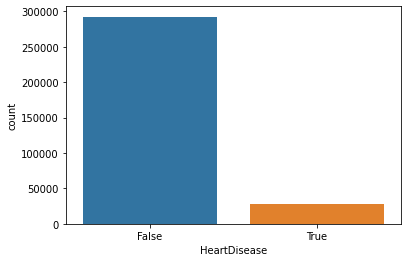

In [31]:
sns.countplot(x = dfHeart_v1['HeartDisease'])

In [32]:
print(f'In terms of percentage, {round(dfHeart_v1["HeartDisease"].sum()/dfHeart_v1["HeartDisease"].count(),3)*100}% of the total dataset has Heart Diseases')

In terms of percentage, 8.6% of the total dataset has Heart Diseases


We are definitely dealing with an unbalanced dataset. 

There are a few solutions we can take. 
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/   
   * Choose Proper Evaluation Metric
   * Resampling (Oversampling and Undersampling)
   * SMOTE
       * https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be
   * BalancedBaggingClassifier
   * Threshold moving       
      
In the preparation step, we will decide which option is the best.

### Boolean Features

Interesting: https://seaborn.pydata.org/tutorial/axis_grids.html



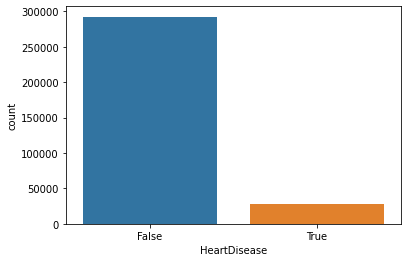

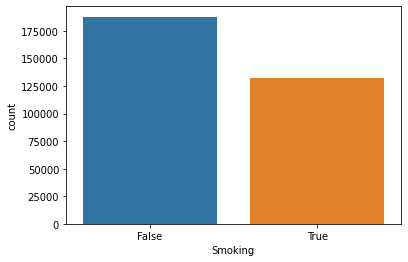

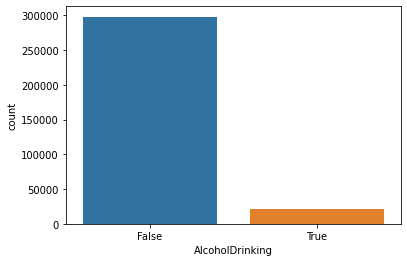

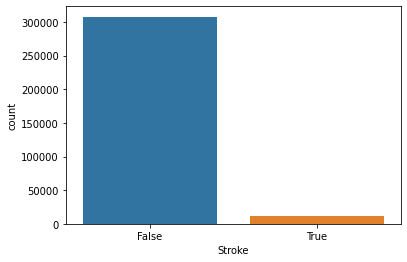

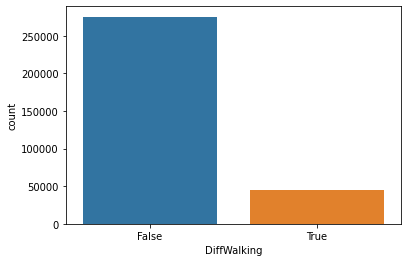

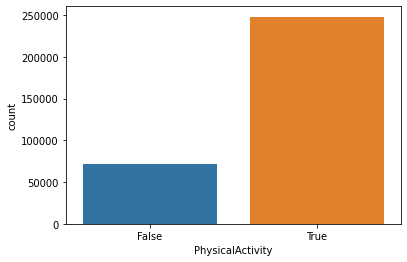

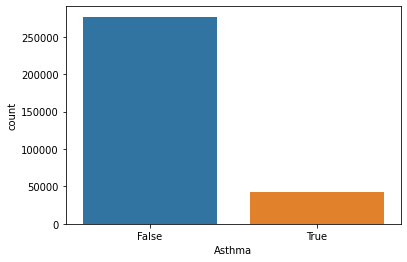

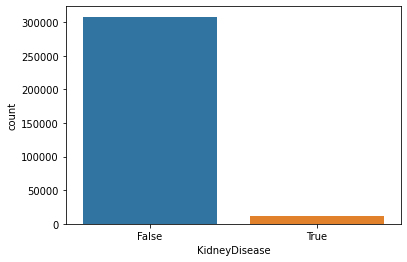

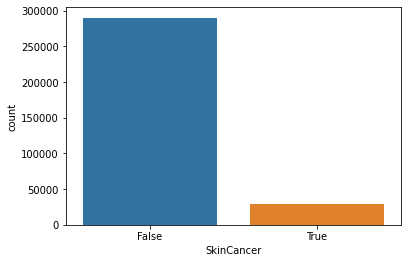

In [33]:
for i in _STRING_TO_BOOL_FEATURES:
    sns.countplot(x = dfHeart_v1[i])
    plt.show()

Some of these features are worrying, since they are very unbalanced.

Namely:
* Stroke
* AlcoholDrinking (Thankfully)
* KidneyDisease
* SkinCancer

But lets look at the True/False proportion of each one to have a clear view.

In [34]:
for i in _STRING_TO_BOOL_FEATURES:
    true_false_rate = round(dfHeart_v1[i].sum()/dfHeart_v1[i].count(),3)
    print(f'True/False rate of {i}: {true_false_rate}{" <----- Less than 0.1" if true_false_rate < 0.1 else ""}'.ljust(10))

True/False rate of HeartDisease: 0.086 <----- Less than 0.1
True/False rate of Smoking: 0.412
True/False rate of AlcoholDrinking: 0.068 <----- Less than 0.1
True/False rate of Stroke: 0.038 <----- Less than 0.1
True/False rate of DiffWalking: 0.139
True/False rate of PhysicalActivity: 0.775
True/False rate of Asthma: 0.134
True/False rate of KidneyDisease: 0.037 <----- Less than 0.1
True/False rate of SkinCancer: 0.093 <----- Less than 0.1


So, the 4 mentioned features, plus the target, have less than 0.1% of True observations.  

TODO:  
* What Decision to take here?

### Continuous

In [35]:
_CONTINUOUS_FEATURES = dfHeart_raw.select_dtypes(include=['float64']).columns

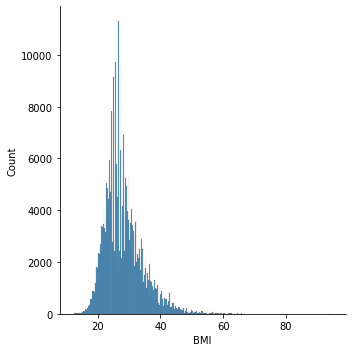

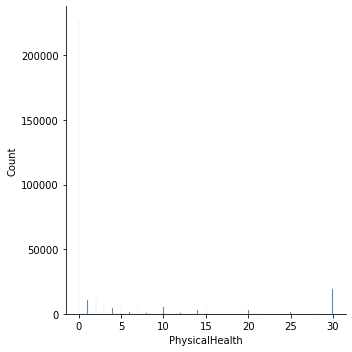

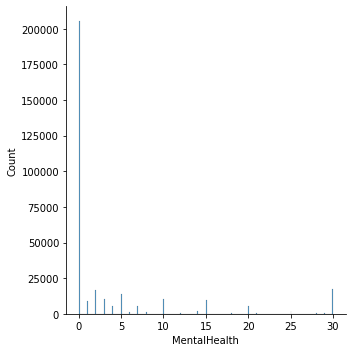

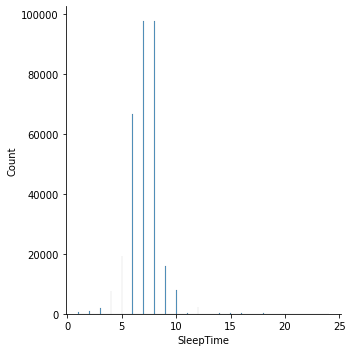

In [36]:
for i in _CONTINUOUS_FEATURES:
    sns.displot(x = dfHeart_v1[i])
    plt.show()

We can clearly see that some of these features are not actually floats, even though their object type in the `float64`.  
Only `BMI`, which appears to follow a normal distribution, is continuos. This feature also might contain outlier candidates.  
`SleepTime` is also continuous but not from a python standpoint.  
Lets change `SleepTime`, `MentalHealth` and `PhysicalHealth` to `int32`

#### Fix Continuous Features

In [37]:
for i in _CONTINUOUS_FEATURES:
    if i != 'BMI':
        logging.debug(f'FEATURE {i} TO int32')
        dfHeart_v1[i] = dfHeart_v1[i].astype('int32')

#### Continuation

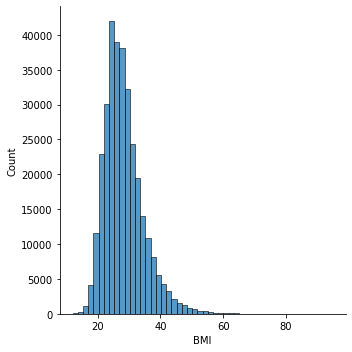

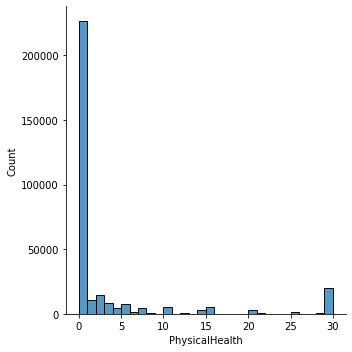

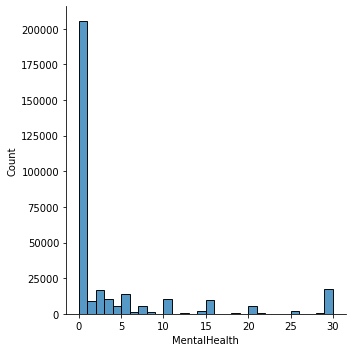

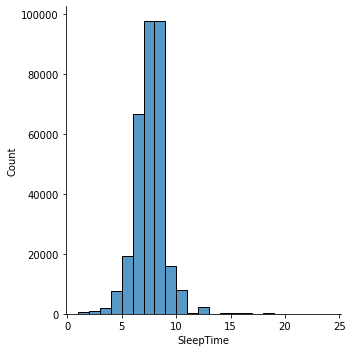

In [38]:
for i in _CONTINUOUS_FEATURES:
    unique_values = dfHeart_v1[i].unique()
    sns.displot(x = dfHeart_v1[i], bins = 50 if i == 'BMI' else max(unique_values) - min(unique_values))
    plt.show()

`BMI` closely follows a gamma distribution more than a normal.  
`Physical` and `Mental` Health are inflated by zeros.  
`SleepTime` closely resembles a normal distribution

### Conclusions

4 of the 9 Boolean features have less than 10% of True cases, which can be a problem in the future for models.  
Also, `Physical` and `Mental` Health are highly inflated by zeros. 

I think it's wise to see what's is the amount of patients who follow these rules:
* AlcoholDrinking = False
* Stroke = False
* KidneyDisease = False
* SkinCancer = False
* MentalHealth = 0
* PhysicalHealth = 0

In [39]:
logging.info(f'Create filtered dataset with 6 features to False or 0')
dfHeart_filter_1 = dfHeart_v1[(dfHeart_v1['AlcoholDrinking'] == False) & (dfHeart_v1['Stroke'] == False) & \
                              (dfHeart_v1['KidneyDisease'] == False) & (dfHeart_v1['SkinCancer'] == False) & \
                              (dfHeart_v1['MentalHealth'] == 0) & (dfHeart_v1['PhysicalHealth'] == 0)]

In [40]:
dfHeart_filter_1.count() / dfHeart_v1.count()

HeartDisease                            0.412255
BMI                                     0.412255
Smoking                                 0.412255
AlcoholDrinking                         0.412255
Stroke                                  0.412255
PhysicalHealth                          0.412255
MentalHealth                            0.412255
DiffWalking                             0.412255
Sex                                     0.412255
PhysicalActivity                        0.412255
GenHealth                               0.412255
SleepTime                               0.412255
Asthma                                  0.412255
KidneyDisease                           0.412255
SkinCancer                              0.412255
race_americanindian/alaskannative_fe    0.412255
race_asian_fe                           0.412255
race_black_fe                           0.412255
race_hispanic_fe                        0.412255
race_other_fe                           0.412255
race_white_fe       

This filter represents 41% of the dataset.  
How about in terms of Heart Disease, our target?



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

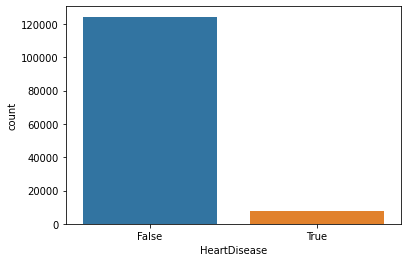

In [41]:
sns.countplot(x = dfHeart_filter_1['HeartDisease'])

In [42]:
print(f'In terms of percentage, about {round(dfHeart_filter_1["HeartDisease"].sum()/dfHeart_filter_1["HeartDisease"].count()*100,3)}% of the filtered dataset has Heart Diseases')

In terms of percentage, about 5.634% of the filtered dataset has Heart Diseases


Even though 6 of the 18 features are False or 0, it doesn't lower that much the chances of heart diseases, that was 8.6% in the total dataset, and in this 41.2% representation of the dataset, it's 5.6%.  
This is a hint into the importance of these features. But it's too early to say they are irrelevant.

In any case, if they are relevant, 41.2% of the dataset will be equal in these 6 features, which can be an issue for the models, or even in infering their importance.

## Correlations

For this module, I will use phik, pearson and CramerV correlations to get a better view of the dataset in this regard. 

In [43]:
corr_phik = dfHeart_v1.phik_matrix()

interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'GenHealth', 'SleepTime', 'race_americanindian/alaskannative_fe', 'race_asian_fe', 'race_black_fe', 'race_hispanic_fe', 'race_other_fe', 'race_white_fe', 'diabetic_no_fe', 'diabetic_no_borderlinediabetes_fe', 'diabetic_yes_fe', 'diabetic_yes_duringpregnancy_fe', 'age_18-24_fe', 'age_25-29_fe', 'age_30-34_fe', 'age_35-39_fe', 'age_40-44_fe', 'age_45-49_fe', 'age_50-54_fe', 'age_55-59_fe', 'age_60-64_fe', 'age_65-69_fe', 'age_70-74_fe', 'age_75-79_fe', 'age_80orolder_fe', 'AgeCategory_seq_fe']


<AxesSubplot:>

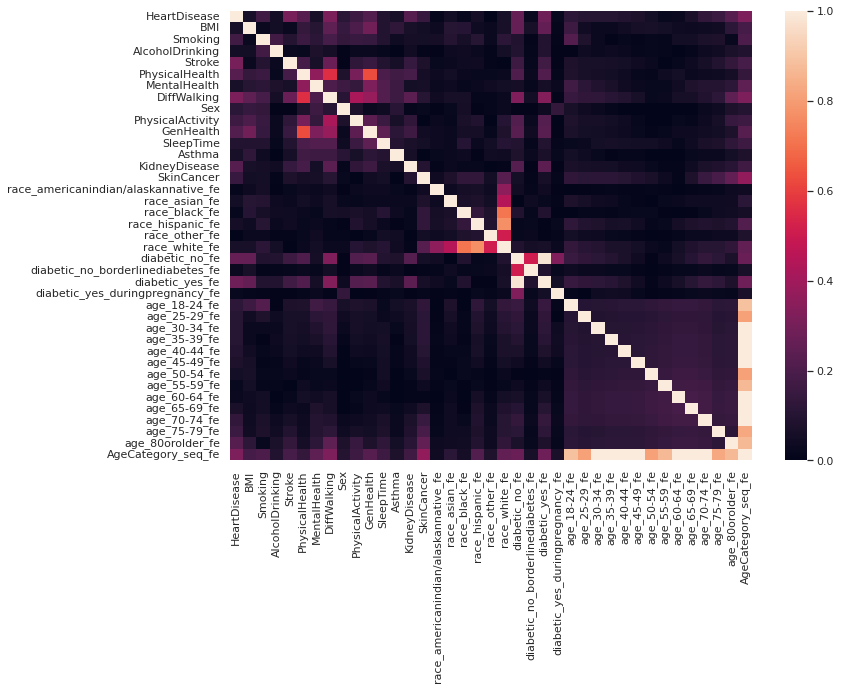

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr_phik)

There's no indication any feature is extremely correlated (0.9 or +) with another.   
But there are a few heat points, namely   
* `PhysicalHealth` and `DiffWalking`
* `PhysicalHealth` and `GenHealth`
* `DiffWalking` and `GenHealth`
* `HeartDisease` and `GenHealth`

In [45]:
_DO_SIGNIFICANCE_MATRIX = False

In [46]:
if _DO_SIGNIFICANCE_MATRIX:
    # get the significance matrix (expressed as one-sided Z)
    # of the hypothesis test of each variable-pair dependency
    # https://phik.readthedocs.io/en/latest/

    ## I have to remove race out of this 
    sig_matrix = dfHeart_v1.significance_matrix()

In [47]:
if _DO_SIGNIFICANCE_MATRIX:
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    # https://stackoverflow.com/questions/71409131/how-to-set-fixed-color-ranges-with-seaborn-heatmap
    my_colors = ['#02ab2e', 'gold', 'orange', 'red', 'darkred']
    my_cmap = ListedColormap(my_colors)
    bounds = [0, 0.000001, 1, 10, 50, 100]
    my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

    grid_kws = {"width_ratios": (.9, .025), "hspace": .8}
    fig, (ax, cbar_ax) = plt.subplots(ncols=2, figsize=(17.7,17.7), gridspec_kw=grid_kws)

    sns.heatmap(sig_matrix,
               yticklabels=1, 
                ax=ax,
                cmap=my_cmap,
                norm=my_norm,
                cbar_ax=cbar_ax,
                cbar_kws={"orientation": "vertical"},
               linewidths=1, linecolor='black')

    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([(b0+b1)/2 for b0, b1 in zip(bounds[:-1], bounds[1:])])
    colorbar.set_ticklabels(['0', ']0-1]', ']1-10]', ']10-50]', ']50+'])

    plt.show()

## Save Dataset



In [48]:
logging.info(f'Saving Dataset')
dfHeart_v1.to_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_preprocessed.parquet')